<a href="https://colab.research.google.com/github/buterajacques1/Credit-Card-Fraud-Detection-Predictive-Models-/blob/main/notebook/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv1D, Dropout, MaxPool1D, BatchNormalization
from IPython.display import SVG
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.regularizers import l1, l2
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/credit_data.csv')

In [3]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
79313,57966,-0.527571,-3.483241,-0.206444,-0.583181,-2.067419,-0.129826,0.454118,-0.149176,1.863281,...,0.691203,0.224470,-0.875993,0.204226,0.079542,0.029189,-0.109220,0.178251,912.79,0.0
79314,57966,-0.541422,1.341092,0.576882,0.733835,0.259657,-0.233639,0.712069,0.190731,-1.067355,...,0.189997,0.493842,-0.141807,-0.406546,-0.043605,-0.287510,0.045194,0.100293,49.33,0.0
79315,57966,-0.830218,0.971781,0.974916,-1.348723,-0.230572,-0.778253,0.395464,0.109896,0.234581,...,-0.115767,-0.335950,-0.068152,-0.109514,-0.204347,0.703500,-0.383530,-0.223780,14.60,0.0
79316,57966,1.104838,-1.141651,0.942113,-0.661271,-1.591229,-0.056758,-1.192570,0.275125,-0.447900,...,0.508825,1.146845,-0.117753,0.241582,0.212189,-0.054096,0.023744,0.026206,99.00,0.0
79317,57967,-3.560685,3.485801,-0.070146,2.191571,-0.429913,1.075498,-0.935968,-2.147517,-1.165398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79318 entries, 0 to 79317
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    79318 non-null  int64  
 1   V1      79318 non-null  float64
 2   V2      79318 non-null  float64
 3   V3      79318 non-null  float64
 4   V4      79318 non-null  float64
 5   V5      79318 non-null  float64
 6   V6      79318 non-null  float64
 7   V7      79318 non-null  float64
 8   V8      79318 non-null  float64
 9   V9      79318 non-null  float64
 10  V10     79318 non-null  float64
 11  V11     79317 non-null  float64
 12  V12     79317 non-null  float64
 13  V13     79317 non-null  float64
 14  V14     79317 non-null  float64
 15  V15     79317 non-null  float64
 16  V16     79317 non-null  float64
 17  V17     79317 non-null  float64
 18  V18     79317 non-null  float64
 19  V19     79317 non-null  float64
 20  V20     79317 non-null  float64
 21  V21     79317 non-null  float64
 22

In [6]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0.0    79126
1.0      191
Name: count, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [8]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
print(legit.shape)
print(fraud.shape)

(79126, 31)
(191, 31)


In [10]:
# statistical measures of the data
legit.Amount.describe()

count    79126.000000
mean        97.773259
std        269.765878
min          0.000000
25%          7.700000
50%         26.925000
75%         89.000000
max      19656.530000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     191.000000
mean       95.142251
std       214.122813
min         0.000000
25%         1.000000
50%         7.520000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [12]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,37164.532164,-0.241928,-0.047016,0.701122,0.152361,-0.264869,0.100851,-0.097874,0.046041,0.000222,...,0.041575,-0.030941,-0.105670,-0.037430,0.007877,0.134383,0.026147,0.000715,0.002542,97.773259
1.0,32448.565445,-6.660361,4.685496,-8.847226,5.220761,-4.885698,-2.012799,-7.016277,3.141649,-3.135469,...,0.378115,0.779382,-0.158471,-0.220629,-0.091717,0.237570,0.096534,0.586070,0.053246,95.142251


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [13]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [14]:
df = pd.concat([legit_sample, fraud], axis=0)

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15208,26560,-0.740712,0.721258,1.174974,-1.836492,0.795460,0.504383,0.592821,0.124015,0.179007,...,-0.176346,-0.221780,-0.248107,-1.316607,-0.244660,0.792423,0.209132,-0.010564,5.76,0.0
38739,39523,-2.055039,-1.147490,0.845974,0.230144,1.194088,-1.487208,-0.628907,0.490379,0.114939,...,0.245973,0.101722,-0.084430,0.113038,-0.449147,0.102152,0.056077,-0.192076,12.36,0.0
46215,42687,-2.538407,2.447668,-0.077438,-0.576407,-1.271472,-0.601475,-1.522198,-1.322198,-0.347755,...,-1.381451,-0.070131,0.319504,0.380541,-0.119534,0.292432,0.098152,0.150176,1.00,0.0
64164,51057,-2.426498,1.245393,0.456538,0.063953,-0.307070,-0.690752,-0.106668,0.704381,-0.287515,...,-0.214500,-0.412064,0.554184,0.070064,-0.058933,0.086097,-0.300723,0.122101,9.85,0.0
27662,34650,-0.808578,-0.979934,0.891612,0.927318,0.272189,-0.247483,0.831015,-0.347402,-1.645353,...,-0.044779,0.165124,0.628555,0.068591,-0.520496,-0.288598,0.000751,0.012585,232.00,0.0


In [16]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
76929,56806,0.016828,2.400826,-4.220360,3.462217,-0.624142,-1.294303,-2.986028,0.751883,-1.606672,...,0.285832,-0.771508,-0.265200,-0.873077,0.939776,-0.219085,0.874494,0.470434,1.00,1.0
77099,56887,-0.075483,1.812355,-2.566981,4.127549,-1.628532,-0.805895,-3.390135,1.019353,-2.451251,...,0.794372,0.270471,-0.143624,0.013566,0.634203,0.213693,0.773625,0.387434,5.00,1.0
77348,57007,-1.271244,2.462675,-2.851395,2.324480,-1.372245,-0.948196,-3.065234,1.166927,-2.268771,...,0.652941,0.081931,-0.221348,-0.523582,0.224228,0.756335,0.632800,0.250187,0.01,1.0
77387,57027,-2.335655,2.225380,-3.379450,2.178538,-3.568264,0.316814,-1.734948,1.449139,-1.980033,...,0.785540,0.297412,0.308536,-0.598416,-0.121850,-0.491018,0.701606,0.206966,444.17,1.0
77682,57163,-10.363049,4.543672,-9.795898,5.508003,-6.037156,-0.133493,-11.724346,-3.198346,-4.767842,...,-2.457145,1.687257,0.977178,-0.543369,-0.289125,-0.107586,0.330642,0.163577,1.00,1.0


In [17]:
df['Class'].value_counts()

Class
0.0    492
1.0    191
Name: count, dtype: int64

In [18]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,37032.396341,-0.144465,-0.003591,0.711053,0.150477,-0.196851,0.036136,-0.124828,0.067368,0.004350,...,-0.011247,-0.041364,-0.145213,-0.036648,0.021654,0.16402,0.049065,-0.005413,-0.003234,76.309228
1.0,32448.565445,-6.660361,4.685496,-8.847226,5.220761,-4.885698,-2.012799,-7.016277,3.141649,-3.135469,...,0.378115,0.779382,-0.158471,-0.220629,-0.091717,0.23757,0.096534,0.586070,0.053246,95.142251


Finding Correlation

In [19]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna(axis='columns', how='all')  # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Credit Card Fraud Dataset', fontsize=15)
    plt.show()

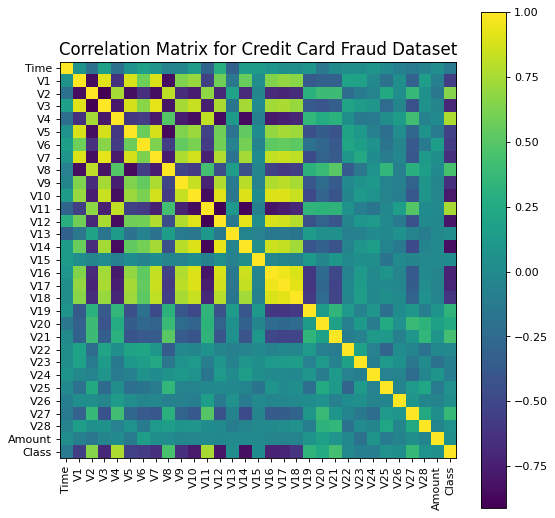

In [20]:

plotCorrelationMatrix(df, 8)


Scatter and Density Plot

In [21]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns', how='all')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

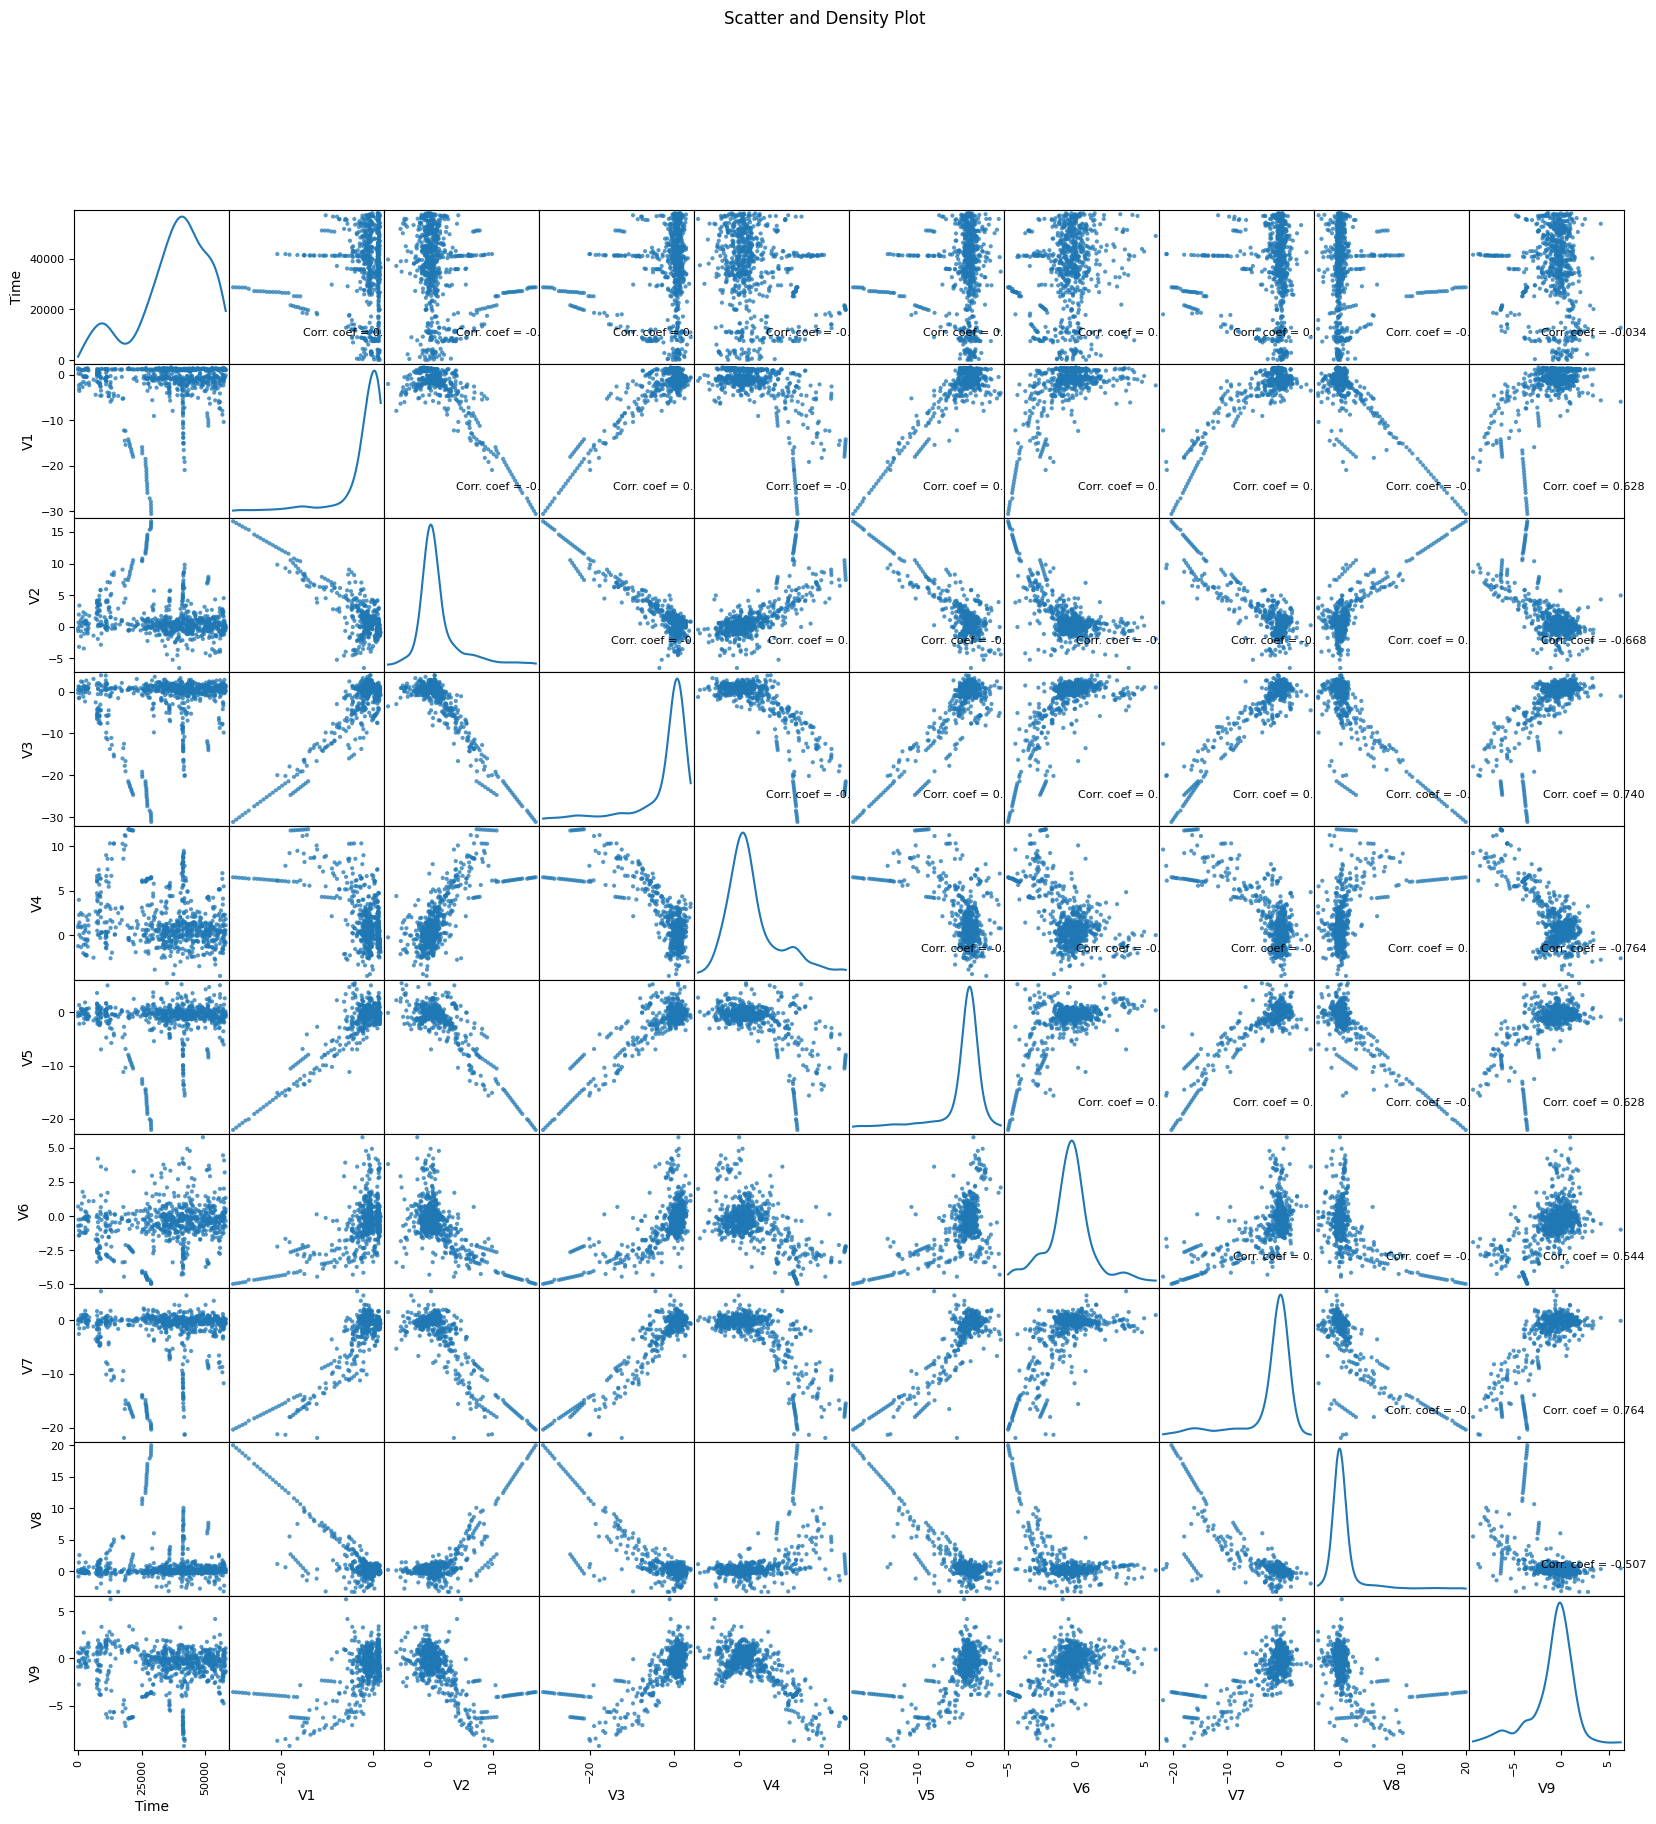

In [22]:
plotScatterMatrix(df, 20, 8)

SECTION 2: Data Preprocessing

In [23]:
# Define features x and y
x = df.drop(columns='Class', axis=1)
y = df['Class']


In [24]:
print(x)

        Time         V1        V2        V3        V4        V5        V6  \
15208  26560  -0.740712  0.721258  1.174974 -1.836492  0.795460  0.504383   
38739  39523  -2.055039 -1.147490  0.845974  0.230144  1.194088 -1.487208   
46215  42687  -2.538407  2.447668 -0.077438 -0.576407 -1.271472 -0.601475   
64164  51057  -2.426498  1.245393  0.456538  0.063953 -0.307070 -0.690752   
27662  34650  -0.808578 -0.979934  0.891612  0.927318  0.272189 -0.247483   
...      ...        ...       ...       ...       ...       ...       ...   
76929  56806   0.016828  2.400826 -4.220360  3.462217 -0.624142 -1.294303   
77099  56887  -0.075483  1.812355 -2.566981  4.127549 -1.628532 -0.805895   
77348  57007  -1.271244  2.462675 -2.851395  2.324480 -1.372245 -0.948196   
77387  57027  -2.335655  2.225380 -3.379450  2.178538 -3.568264  0.316814   
77682  57163 -10.363049  4.543672 -9.795898  5.508003 -6.037156 -0.133493   

              V7        V8        V9  ...       V20       V21       V22  \


In [25]:
print(y)

15208    0.0
38739    0.0
46215    0.0
64164    0.0
27662    0.0
        ... 
76929    1.0
77099    1.0
77348    1.0
77387    1.0
77682    1.0
Name: Class, Length: 683, dtype: float64


In [26]:
print(x.shape, y.shape)

(683, 30) (683,)


Split the data into Training data & Testing Data

In [27]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(546, 30) (546,) (137, 30) (137,)


Train Model without Optimization

In [29]:
epochs = 50
model1 = Sequential()
# Add convolution 2D
model1.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))

model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1,activation='sigmoid'))

In [58]:
# Compile the model without any optimization technique
model1.compile(loss=categorical_crossentropy,
              metrics=['accuracy'])
model1.save('saved_models/model1.pkl')

In [ ]:
model1.summary()

In [ ]:
# Train the model
history = model1.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

In [ ]:
# Print the final accuracy
_, train_accuracy = model1.evaluate(X_train, y_train)
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


**Saving the trained model**

In [36]:
import pickle

filename = "model1.h5"
pickle.dump(model1, open(filename, 'wb'))


# loading the saved model

loaded_model1 = pickle.load(open('model1.h5', 'rb'))

In [39]:
input_data = (0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62)

#channging the input_data to numpy array

input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model1.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The data is legit')

else:
  print('The data is fraud')

1/1 [==============================] - 0s 124ms/step
[[0.]]
The data is legit


In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

Model Training with Optimization Techniques

Adam Optimization

In [ ]:
model2 = Sequential()
# Add convolution 2D
model2.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics=['accuracy'])
model2.save('saved_models/model2.pkl')
model2.summary()

In [ ]:
adam_model = model2.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

In [44]:
_, train_accuracy = model2.evaluate(X_train, y_train)
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

5/5 [==============================] - 0s 4ms/step - loss: 0.1812 - accuracy: 0.9562
Training Accuracy: 97.07%
Test Accuracy: 95.62%


In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(adam_model.history['accuracy'])
plt.plot(adam_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

Stochastic Gradient Descent Optimization technique

In [ ]:
model3 = Sequential()
# Add convolution 2D
model3.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(1,activation='sigmoid'))


model3.compile(optimizer=SGD(0.9),loss='binary_crossentropy',metrics=['accuracy'])
model3.save('saved_models/model3.pkl')
model3.summary()

In [ ]:
sgd_model = model3.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

In [48]:
_, train_accuracy = model3.evaluate(X_train, y_train)
test_loss, test_accuracy = model3.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

5/5 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.7591
Training Accuracy: 71.06%
Test Accuracy: 75.91%


In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(sgd_model.history['accuracy'])
plt.plot(sgd_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

Root Mean Square Propagation

In [ ]:
model4 = Sequential()
model4.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

model4.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Flatten())
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(1,activation='sigmoid'))


model4.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])
model4.save('saved_models/model4.pkl')
model4.summary()

In [ ]:
rms_model = model4.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

In [ ]:
_, train_accuracy = model4.evaluate(X_train, y_train)
test_loss, test_accuracy = model4.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(rms_model.history['accuracy'])
plt.plot(rms_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

Error Analysis: Make Predictions using the best saved model

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = (model1.predict(X_test) > 0.5).astype("int32")
accuracy_score(y_test,y_pred)
def make_predictions(model_path, X_test, y_test):
    # Load the model
    model = load_model(model_path)
    y_pred = (model1.predict(X_test) > 0.5).astype("int32")

    accuracy_score(y_test,y_pred)
    # Make predictions
    predictions = model1.predict(X_test)

    # Convert probabilities to binary labels (0 or 1)
    predictions_labels = np.round(predictions).flatten()

    # Convert y_test to binary labels (assuming it's 0 or 1)
    true_labels = y_test

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(true_labels, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Calculate classification report
    report = classification_report(true_labels, y_pred)
    print("Classification Report:\n", report)


Without Optimization

In [63]:
model_path = 'saved_models/model1.pkl'
make_predictions(model_path, X_test, y_test )

5/5 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[104   0]
 [ 23  10]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       104
         1.0       1.00      0.30      0.47        33

    accuracy                           0.83       137
   macro avg       0.91      0.65      0.68       137
weighted avg       0.86      0.83      0.80       137



With Adam Optimization

In [60]:
model_path = 'saved_models/model2.pkl'
make_predictions(model_path, X_test, y_test )

5/5 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[104   0]
 [ 23  10]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       104
         1.0       1.00      0.30      0.47        33

    accuracy                           0.83       137
   macro avg       0.91      0.65      0.68       137
weighted avg       0.86      0.83      0.80       137



With SGD

In [61]:
model_path = 'saved_models/model3.pkl'
make_predictions(model_path, X_test, y_test )

5/5 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[104   0]
 [ 23  10]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       104
         1.0       1.00      0.30      0.47        33

    accuracy                           0.83       137
   macro avg       0.91      0.65      0.68       137
weighted avg       0.86      0.83      0.80       137



With RMSOp

In [62]:
model_path = 'saved_models/model4.pkl'
make_predictions(model_path, X_test, y_test )


5/5 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[104   0]
 [ 23  10]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       104
         1.0       1.00      0.30      0.47        33

    accuracy                           0.83       137
   macro avg       0.91      0.65      0.68       137
weighted avg       0.86      0.83      0.80       137

